In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**한국 교사들 데이터**

In [2]:
teacher_df = pd.read_csv('data/CY08MSP_TCH_KOR_VARS select.csv')

In [3]:
teacher_df = teacher_df.iloc[:, :-1]  # 마지막 열 제거
teacher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Columns: 526 entries, CNT to VER_DAT
dtypes: float64(117), int64(407), object(2)
memory usage: 14.5+ MB


**한국 교수들 데이터에 사용된 변수 목록**

In [4]:
teacher_vars_origin = pd.read_csv('data/TCH_VARS_original.csv')
teacher_vars_origin.head()

,변수,설명,측도,결측값
0,CNT,Country code 3-character,명목(N),없음
1,CNTTCHID,Intl. Teacher ID,명목(N),없음
2,TCHTYPE,Teacher Type,명목(N),"7, 8, 9"
3,TC001Q01NA,Are you female or male?,명목(N),95 - 99
4,TC002Q01NA,How old are you?,척도(S),95 - 99


**분석 대상 변수 목록 지정**

In [5]:
teacher_vars = pd.read_csv('data/TCH_VARS_selected.csv')
teacher_vars_list = teacher_vars['변수'].to_list()

In [6]:
teacher_df = teacher_df[teacher_vars_list]
teacher_df.shape

(3614, 118)

**결측치 확인 후 전처리**

- 99 등이 결측치 대신 사용됨.

In [7]:
teacher_df.describe(percentiles=[0.9, 0.92, 0.95, 0.99])

,TCHTYPE,TC001Q01NA,TC002Q01NA,TC007Q02NA,TC215Q01JA,TC216Q01JA,TC216Q02JA,TC216Q03JA,TC216Q04JA,TC216Q05JA,...,CREATPED,CAPCON,AFFECT,TRUST,OVERLOAD,AUTONOMY,LEADSHIP,OCSTRESS,STRESS,NEGSYMPT
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,...,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,1.684283,1.573879,43.959878,16.259546,350.731599,28.769231,27.575816,48.882125,58.855285,52.203929,...,0.825549,0.967207,0.781324,0.846966,1.453154,1.155628,1.357440,1.490599,1.458462,1.674074
std,0.464865,3.660585,9.821958,11.012970,5508.108954,110.347336,135.708507,207.872831,228.213614,213.661046,...,11.185266,11.292714,10.945370,10.934424,11.343863,10.534830,12.175294,11.094712,11.934829,12.136062
min,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.804800,-3.894700,-3.139800,-3.009000,-3.506700,-3.401700,-2.030100,-3.761100,-2.721200,-2.325700
50%,2.000000,1.000000,44.000000,16.000000,40.000000,16.000000,8.000000,3.000000,3.000000,3.000000,...,-0.619800,-0.137700,-0.054400,-0.475100,0.167600,-0.161800,-0.294600,0.209400,0.167100,0.251400
90%,2.000000,2.000000,57.000000,31.000000,60.000000,20.000000,18.000000,10.000000,10.000000,10.000000,...,0.917300,1.064800,0.853210,1.191300,1.049510,1.344200,0.858900,0.988000,0.963380,1.193170
92%,2.000000,2.000000,58.000000,32.000000,60.000000,20.000000,20.000000,10.000000,10.000000,13.000000,...,1.056900,1.210300,1.165900,1.557900,1.155900,1.726400,1.130800,1.142872,1.071476,1.319288
95%,2.000000,2.000000,60.000000,34.000000,65.000000,23.000000,23.000000,20.000000,999.000000,54.150000,...,1.766800,2.312300,1.740600,1.557900,1.474300,2.565200,1.821400,1.385700,1.277210,1.670440
99%,2.000000,2.000000,62.000000,37.870000,193.500000,999.000000,999.000000,999.000000,999.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,2.000000,99.000000,99.000000,99.000000,99999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [8]:
teacher_vars_df = teacher_vars.merge(teacher_vars_origin, on='변수', how='left')
teacher_vars_df

,변수,설명,측도,결측값
0,TCHTYPE,Teacher Type,명목(N),"7, 8, 9"
1,TC001Q01NA,Are you female or male?,명목(N),95 - 99
2,TC002Q01NA,How old are you?,척도(S),95 - 99
3,TC007Q02NA,How many years of work experience do you have:...,척도(S),95 - 99
4,TC215Q01JA,"During most recent complete calendar week, app...",명목(N),99995 - 99999
...,...,...,...,...
113,AUTONOMY,Teachers' work autonomy (WLE),척도(S),95.0000 - 99.0000
114,LEADSHIP,School leadership (WLE),척도(S),95.0000 - 99.0000
115,OCSTRESS,Occupational stress (WLE),척도(S),95.0000 - 99.0000
116,STRESS,Sources of stress (WLE),척도(S),95.0000 - 99.0000


**변수별 결측치값 확인**

변수별 결측치값을 실제 결측치로 간주되도록 모두 `np.nan`으로 대체한다.
`missing_map는` 열별 결측치를 어레이로 지정한다.

In [9]:
import re
delimiter = r' - |, ' # 결측값 표현에 사용된 구분자: ' - ' 또는 ', '

def parse_missing_codes(code_str):
    """'99, 999' -> [99.0, 999.0] 변환"""
    if pd.isna(code_str) or code_str == '':
        return np.array([np.nan])
    elif code_str == '없음':
        return np.array([np.nan])
    else:
        missing_range = [float(x.strip()) for x in re.split(delimiter, str(code_str))]
        return np.arange(missing_range[0], missing_range[-1] + 1)

# 변수명-결측값 어레이 사전 생성
missing_map = dict(zip(
    teacher_vars_df['변수'],
    teacher_vars_df['결측값'].apply(parse_missing_codes)
))

In [10]:
missing_map

{'TCHTYPE': array([7., 8., 9.]),
 'TC001Q01NA': array([95., 96., 97., 98., 99.]),
 'TC002Q01NA': array([95., 96., 97., 98., 99.]),
 'TC007Q02NA': array([95., 96., 97., 98., 99.]),
 'TC215Q01JA': array([99995., 99996., 99997., 99998., 99999.]),
 'TC216Q01JA': array([995., 996., 997., 998., 999.]),
 'TC216Q02JA': array([995., 996., 997., 998., 999.]),
 'TC216Q03JA': array([995., 996., 997., 998., 999.]),
 'TC216Q04JA': array([995., 996., 997., 998., 999.]),
 'TC216Q05JA': array([995., 996., 997., 998., 999.]),
 'TC216Q06JA': array([995., 996., 997., 998., 999.]),
 'TC216Q07JA': array([995., 996., 997., 998., 999.]),
 'TC217Q01NA': array([95., 96., 97., 98., 99.]),
 'TC216Q08JA': array([995., 996., 997., 998., 999.]),
 'TC218Q01JA': array([95., 96., 97., 98., 99.]),
 'TC150Q01HA': array([95., 96., 97., 98., 99.]),
 'TC150Q02HA': array([95., 96., 97., 98., 99.]),
 'TC150Q03HA': array([95., 96., 97., 98., 99.]),
 'TC150Q04HA': array([95., 96., 97., 98., 99.]),
 'TC150Q06HA': array([95., 96.

열별 결측값을 일괄적으로 `np.nan`으로 치환

In [11]:
for col, codes in missing_map.items():
    if len(codes) > 1:
        teacher_df.loc[teacher_df.loc[:, col].isin(codes), col] = np.nan

In [12]:
teacher_df.describe()

,TCHTYPE,TC001Q01NA,TC002Q01NA,TC007Q02NA,TC215Q01JA,TC216Q01JA,TC216Q02JA,TC216Q03JA,TC216Q04JA,TC216Q05JA,...,CREATPED,CAPCON,AFFECT,TRUST,OVERLOAD,AUTONOMY,LEADSHIP,OCSTRESS,STRESS,NEGSYMPT
count,3614.000000,3609.000000,3608.000000,3604.000000,3603.000000,3568.000000,3545.000000,3449.000000,3413.000000,3439.000000,...,3568.000000,3567.000000,3570.000000,3570.000000,3566.000000,3573.000000,3559.000000,3568.000000,3561.000000,3559.000000
mean,1.684283,1.438903,43.868348,16.030244,46.504302,16.260650,8.667983,3.428530,3.487841,4.024426,...,-0.440153,-0.324506,-0.429214,-0.362764,0.140129,0.032868,-0.151507,0.233471,0.006706,0.170020
std,0.464865,0.496322,9.569938,10.129877,123.273670,6.119032,6.711867,3.674812,3.799902,4.835814,...,0.909236,0.933495,0.938867,0.894372,0.757571,1.053157,0.934281,0.695030,0.897948,0.934558
min,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.804800,-3.894700,-3.139800,-3.009000,-3.506700,-3.401700,-2.030100,-3.761100,-2.721200,-2.325700
25%,1.000000,1.000000,36.000000,8.000000,25.000000,15.000000,5.000000,1.000000,2.000000,1.000000,...,-1.003425,-0.924100,-1.005800,-0.887800,-0.351600,-0.627800,-0.634800,-0.014900,-0.332400,-0.230350
50%,2.000000,1.000000,44.000000,15.500000,40.000000,16.000000,8.000000,2.000000,3.000000,3.000000,...,-0.636300,-0.137700,-0.054400,-0.475100,0.135000,-0.184300,-0.303400,0.209400,0.147300,0.243200
75%,2.000000,2.000000,51.000000,23.000000,50.000000,18.000000,10.000000,5.000000,5.000000,5.000000,...,0.018900,-0.137700,-0.054400,0.200700,0.581200,0.613100,0.400300,0.591500,0.503200,0.703000
max,2.000000,2.000000,64.000000,46.000000,3310.000000,100.000000,80.000000,70.000000,60.000000,100.000000,...,1.766800,2.330100,1.740600,1.557900,3.371300,2.565200,2.754700,1.465000,3.682900,3.838000


열별 결측치 개수를 확인한다.
종속 변수로 사용될 FEEDBINSTR와 FEEDBINSTR에 각각 583개의 결측치가 존재한다.

In [13]:
teacher_df[['FEEDBINSTR', 'ADAPTINSTR']].isnull().sum()

FEEDBINSTR    583
ADAPTINSTR    583
dtype: int64

아래 19개 변수(열)에서의 결측치가 86%를 넘기에 모두 삭제한다.

In [14]:
teacher_df.isnull().sum().sort_values(ascending=False).head(20)

TC150Q06HA    3134
TC150Q04HA    3127
TC150Q03HA    3122
TC150Q02HA    3121
TC204Q03HA    3119
TC150Q08HA    3118
TC204Q02HA    3118
TC204Q01HA    3118
TC203Q02HA    3117
TC203Q03HA    3117
TC203Q01HA    3117
EXPO21TC      3115
ICTMATTC      3114
TCMGOALS      3114
COGACRTC      3114
COGACMTC      3114
TCDISCLIMA    3114
TC231Q01JA    3113
TC150Q01HA    3113
ICTOTL         593
dtype: int64

In [15]:
3113/teacher_df.shape[0]

0.8613724405091312

In [16]:
columns_to_drop = teacher_df.isnull().sum().sort_values(ascending=False).head(19).index.tolist()
teacher_df = teacher_df.drop(columns=columns_to_drop)

In [17]:
teacher_df.shape

(3614, 99)

**종속변수의 결측치 제거**

종속변수로 사용될 FEEDBINSTR와 ADAPTINSTR 값이 결측치인 행은 모두 삭제한다.

In [18]:
teacher_df = teacher_df.dropna(subset=['FEEDBINSTR', 'ADAPTINSTR'], how='any')

남은 결측치

In [19]:
teacher_df.isnull().sum().sort_values(ascending=False).head(30)

TC216Q08JA    332
TC216Q07JA    315
TC245Q01JA    220
TC244Q05JA    177
TC244Q04JA    176
TC244Q03JA    175
TC244Q02JA    172
TC244Q06JA    169
TC216Q04JA    165
TC244Q01JA    159
TC216Q03JA    135
TC216Q05JA    131
PROPWORK      110
TC216Q06JA     65
TC216Q02JA     49
TC216Q01JA     34
TCICTUSE       32
DEVNEED        27
ICTCOMP        23
NEGSYMPT       20
TCDIGRES       17
LEADSHIP       17
ICTOTL         15
STRESS         15
TC247Q02JA     14
TC247Q04JA     14
TC247Q01JA     13
OCSTRESS       10
CAPCON         10
PRPDT          10
dtype: int64

아래 5 개의 열은 분석에 사용하지 않음.

In [20]:
columns_to_drop2 = ['TC216Q07JA', 'TC216Q08JA'] + ['TC244Q05JA'] + ['PROPWORK', 'COBN_T']
teacher_df = teacher_df.drop(columns=columns_to_drop2, axis=1)

나머지 결측치는 모두 삭제

In [21]:
teacher_df = teacher_df.dropna()

총 95개의 열을 갖는 2,406 데이터셋이 생성됨.

In [22]:
teacher_df.shape

(2406, 94)

### 열별 측도 조정

열별로 지정된 측도는 세 종류다.

In [23]:
teacher_vars_df['측도'].value_counts()

측도
순서(O)    44
명목(N)    39
척도(S)    35
Name: count, dtype: int64

In [24]:
mask_order = teacher_vars_df['측도'] == '순서(O)'
order_cols = teacher_vars_df.loc[mask_order, '변수'].to_list()
order_cols = [col for col in order_cols if col in teacher_df.columns]
len(order_cols)

42

In [25]:
mask_nominal = teacher_vars_df['측도'] == '명목(N)'
nominal_cols = teacher_vars_df.loc[mask_nominal, '변수'].to_list()
nominal_cols = [col for col in nominal_cols if col in teacher_df.columns]
len(nominal_cols)

22

In [26]:
mask_scala = teacher_vars_df['측도'] == '척도(S)'
scala_cols = teacher_vars_df.loc[mask_scala, '변수'].to_list()
scala_cols = [col for col in scala_cols if col in teacher_df.columns]
len(scala_cols)

30

명목 열의 dtype을 object로 변환시킨다.

In [27]:
for col in nominal_cols:
    teacher_df[col] = teacher_df[col].astype('object')  # pandas ObjectDtype

In [28]:
nominal_cols = teacher_df.select_dtypes(include=['object']).columns.tolist()
nominal_cols

['TCHTYPE',
 'TC001Q01NA',
 'TC215Q01JA',
 'TC216Q01JA',
 'TC216Q02JA',
 'TC216Q03JA',
 'TC216Q04JA',
 'TC216Q05JA',
 'TC216Q06JA',
 'TC217Q01NA',
 'TC218Q01JA',
 'TC244Q01JA',
 'TC244Q02JA',
 'TC244Q03JA',
 'TC244Q04JA',
 'TC244Q06JA',
 'TC245Q01JA',
 'TC247Q01JA',
 'TC247Q02JA',
 'TC247Q03JA',
 'TC247Q04JA',
 'TC248Q01JA']

### 명목열 원-핫 인코딩 전처리

In [29]:
teacher_df = pd.get_dummies(teacher_df,
                            columns=nominal_cols,
                            prefix=nominal_cols,
                            prefix_sep="_",
                            dummy_na=False,
                            dtype=np.float64,
                            )

print(f"원-핫 인코딩 완료: {len(nominal_cols)}개 열 -> {teacher_df.shape[1]}개 총 열")

원-핫 인코딩 완료: 22개 열 -> 676개 총 열


In [30]:
teacher_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2406 entries, 3 to 3613
Columns: 676 entries, TC002Q01NA to TC248Q01JA_2.0
dtypes: float64(676)
memory usage: 12.4 MB


#### 훈련셋 지정

- 'FEEDBINSTR', 'ADAPTINSTR'를 메인 타깃으로 사용하기에 컬럼에서 제외한다.

In [31]:
main_targets = ['FEEDBINSTR', 'ADAPTINSTR']
train_df = teacher_df.drop(columns=main_targets, axis=1)

## PyCaret 활용 후 특성주요도 시각화

In [32]:
from pycaret.regression import setup, compare_models, tune_model, finalize_model, predict_model, pull
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pycaret를 이용한 회귀 AutoML 활용 함수 정의

In [33]:
def run_pycaret_regression(target,
                           train_set=train_df,
                           train_size=0.8,
                           fold=4,
                           normalize=False,
                           preprocess=False,
                           random_state=42):
    # 1. PyCaret용 데이터프레임 준비
    if target not in train_set.columns:
        target_df = teacher_df[[target]]
        data_df = pd.concat([train_set, target_df], axis=1)
    else:
        data_df = train_set.copy()

    exp = setup(
        data=data_df,
        target=target,
        session_id=random_state,
        train_size=train_size,
        fold=fold,
        normalize=normalize,   # 전처리 이미 수행했으므로 False 유지
        preprocess=preprocess,  # 수동 원-핫 인코딩만 사용 (다른 전처리 없음)
    )

    # 2. 여러 회귀 모델 자동 비교 (R2 기준 상위 모델 선택)
    best_model = compare_models(
        include=["gbr", "rf", "et"],
        sort="R2"
        )

    results_table = pull()
    print("\n=== PyCaret Compare Models (정렬: R2) ===")
    print(results_table)

    # 3. 선택된 최고 모델 추가 튜닝
    tuned_model = tune_model(best_model, optimize="R2")
    tuned_results = pull()
    print("\n=== Tuned Best Model 결과 ===")
    print(tuned_results)

    # 4. 최종 모델 확정 및 Hold-out 평가
    final_model = finalize_model(tuned_model)

    # PyCaret 내부 테스트셋 성능 요약
    final_results = pull()
    print("\n=== Finalized Model (PyCaret 내부 평가) ===")
    print(final_results)

    return final_model, data_df

final_model의 특성 중요도 확인 함수 정의

In [ ]:
def get_feature_importances(model, data_df, target, num_features=20):
    importances = model.feature_importances_
    if num_features is None:
        num_features = len(importances)
    indices = np.argsort(importances)[::-1][:num_features]  # 상위 num_features개

    if target in data_df.columns:
        input_df = data_df.drop(columns=[target])
    else:
        input_df = data_df
    important_features = [(input_df.columns[i], importances[i]) for i in indices]

    print(f"\nTop {num_features} Feature Importances (final_model):")
    for name, score in important_features:
        print(f"{name:40s} {score:.4f}")
    return important_features

final_model의 특성 중요도 시각화 함수 정의

In [35]:
def plot_feature_importances(important_features, target):
    plt.style.use("seaborn-v0_8-white")  # 그리드 없는 심플 스타일
    plt.rcParams["font.family"] = "DejaVu Sans"

    feat_names = [name for name, _ in important_features]
    feat_scores = [score for _, score in important_features]

    # N = 20
    # indices = sorted(
    #     range(len(feat_scores)),
    #     key=lambda i: feat_scores[i],
    #     reverse=True
    # )[:N]

    indices = range(len(feat_scores))

    feat_names_plot = [feat_names[i] for i in indices][::-1]
    feat_scores_plot = [feat_scores[i] for i in indices][::-1]

    plt.figure(figsize=(9, 7))

    colors = plt.cm.Blues(
        [0.3 + 0.7 * (i / max(1, len(feat_scores_plot) - 1))
        for i in range(len(feat_scores_plot))]
    )

    bars = plt.barh(
        range(len(feat_scores_plot)),
        feat_scores_plot,
        color=colors,
        edgecolor="none"
    )

    max_score = max(feat_scores_plot)
    plt.xlim(0, max_score * 1.1)  # 15% 여유. 더 넓게 하려면 계수 조절

    plt.yticks(range(len(feat_scores_plot)), feat_names_plot, fontsize=9)
    plt.xlabel("Feature Importance", fontsize=11)
    plt.title(f"Target: {target}", fontsize=13, pad=10)

    # 특성중요도 값 레이블 추가
    for bar, score in zip(bars, feat_scores_plot):
        width = bar.get_width()
        plt.text(
            width + max(feat_scores_plot) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f"{score:.3f}",
            va="center",
            fontsize=8
        )

    plt.tight_layout()
    plt.show()

### 종속변수 별 특성중요도

#### 종속변수: FEEDBINSTR

,Description,Value
0,Session id,42
1,Target,FEEDBINSTR
2,Target type,Regression
3,Original data shape,"(2406, 676)"
4,Transformed data shape,"(2406, 676)"
5,Transformed train set shape,"(2165, 676)"
6,Transformed test set shape,"(241, 676)"
7,Numeric features,675


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4712,0.3928,0.6264,0.5789,0.3033,1.1560,0.8380
et,Extra Trees Regressor,0.4717,0.4055,0.6363,0.5653,0.3070,1.1340,1.0080
rf,Random Forest Regressor,0.4736,0.4098,0.6397,0.5606,0.3057,1.1490,0.9220



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
gbr  Gradient Boosting Regressor  0.4712  0.3928  0.6264  0.5789  0.3033   
et         Extra Trees Regressor  0.4717  0.4055  0.6363  0.5653  0.3070   
rf       Random Forest Regressor  0.4736  0.4098  0.6397  0.5606  0.3057   

      MAPE  TT (Sec)  
gbr  1.156     0.838  
et   1.134     1.008  
rf   1.149     0.922  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4945,0.3974,0.6304,0.5338,0.3146,1.3936
1,0.4988,0.4254,0.6522,0.5190,0.3128,1.1796
2,0.4931,0.3976,0.6306,0.5634,0.3135,1.1556
3,0.5180,0.4687,0.6846,0.5445,0.3200,1.3053
4,0.5043,0.4138,0.6433,0.5878,0.3197,1.1976
Mean,0.5017,0.4206,0.6482,0.5497,0.3161,1.2463
Std,0.0090,0.0263,0.0200,0.0239,0.0031,0.0897


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4945  0.3974  0.6304  0.5338  0.3146  1.3936
1     0.4988  0.4254  0.6522  0.5190  0.3128  1.1796
2     0.4931  0.3976  0.6306  0.5634  0.3135  1.1556
3     0.5180  0.4687  0.6846  0.5445  0.3200  1.3053
4     0.5043  0.4138  0.6433  0.5878  0.3197  1.1976
Mean  0.5017  0.4206  0.6482  0.5497  0.3161  1.2463
Std   0.0090  0.0263  0.0200  0.0239  0.0031  0.0897

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.4945  0.3974  0.6304  0.5338  0.3146  1.3936
1     0.4988  0.4254  0.6522  0.5190  0.3128  1.1796
2     0.4931  0.3976  0.6306  0

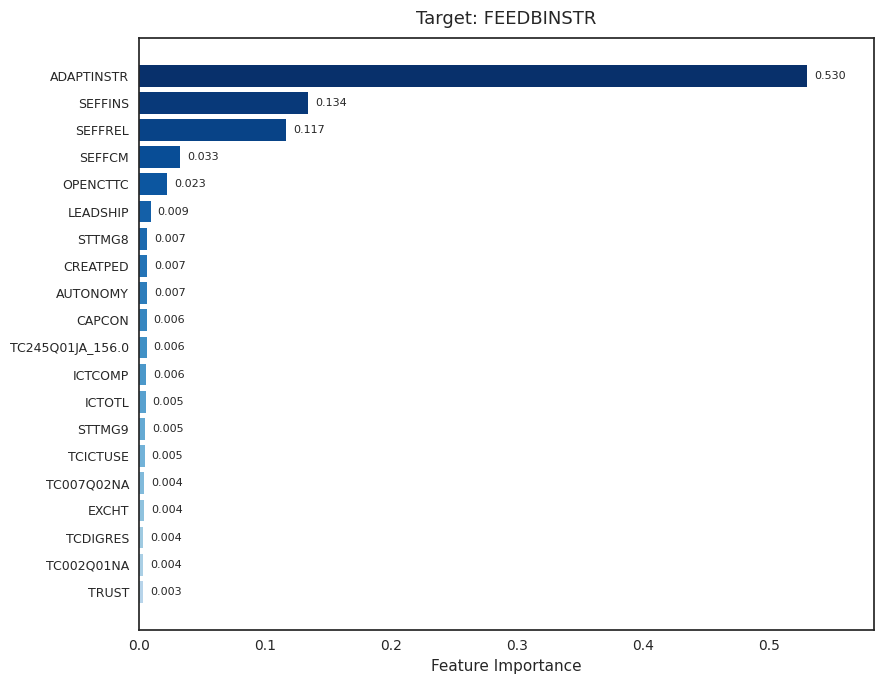

In [36]:
target = 'FEEDBINSTR'
final_model, data_df = run_pycaret_regression(target, train_set=teacher_df, train_size=0.9, fold=5)
important_features = get_feature_importances(final_model, data_df, target)
plot_feature_importances(important_features, target)

,Description,Value
0,Session id,42
1,Target,FEEDBINSTR
2,Target type,Regression
3,Original data shape,"(2406, 675)"
4,Transformed data shape,"(2406, 675)"
5,Transformed train set shape,"(1924, 675)"
6,Transformed test set shape,"(482, 675)"
7,Numeric features,674


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5497,0.5138,0.7158,0.4569,0.3392,1.3175,0.3375
rf,Random Forest Regressor,0.5522,0.5219,0.7213,0.4488,0.3440,1.2821,0.4325
et,Extra Trees Regressor,0.5610,0.5276,0.7253,0.4426,0.3522,1.3046,0.4250



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
gbr  Gradient Boosting Regressor  0.5497  0.5138  0.7158  0.4569  0.3392   
rf       Random Forest Regressor  0.5522  0.5219  0.7213  0.4488  0.3440   
et         Extra Trees Regressor  0.5610  0.5276  0.7253  0.4426  0.3522   

       MAPE  TT (Sec)  
gbr  1.3175    0.3375  
rf   1.2821    0.4325  
et   1.3046    0.4250  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5512,0.4971,0.7051,0.4222,0.3362,1.3627
1,0.5210,0.4478,0.6692,0.4943,0.3411,1.1495
2,0.5911,0.5821,0.7630,0.4314,0.3507,1.3104
3,0.5862,0.5536,0.7441,0.4552,0.3604,1.3475
Mean,0.5624,0.5202,0.7203,0.4508,0.3471,1.2925
Std,0.0284,0.0518,0.0362,0.0279,0.0093,0.0847


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5512  0.4971  0.7051  0.4222  0.3362  1.3627
1     0.5210  0.4478  0.6692  0.4943  0.3411  1.1495
2     0.5911  0.5821  0.7630  0.4314  0.3507  1.3104
3     0.5862  0.5536  0.7441  0.4552  0.3604  1.3475
Mean  0.5624  0.5202  0.7203  0.4508  0.3471  1.2925
Std   0.0284  0.0518  0.0362  0.0279  0.0093  0.0847

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5512  0.4971  0.7051  0.4222  0.3362  1.3627
1     0.5210  0.4478  0.6692  0.4943  0.3411  1.1495
2     0.5911  0.5821  0.7630  0.4314  0.3507  1.3104
3     0.5862  0.5536  0.7441  0

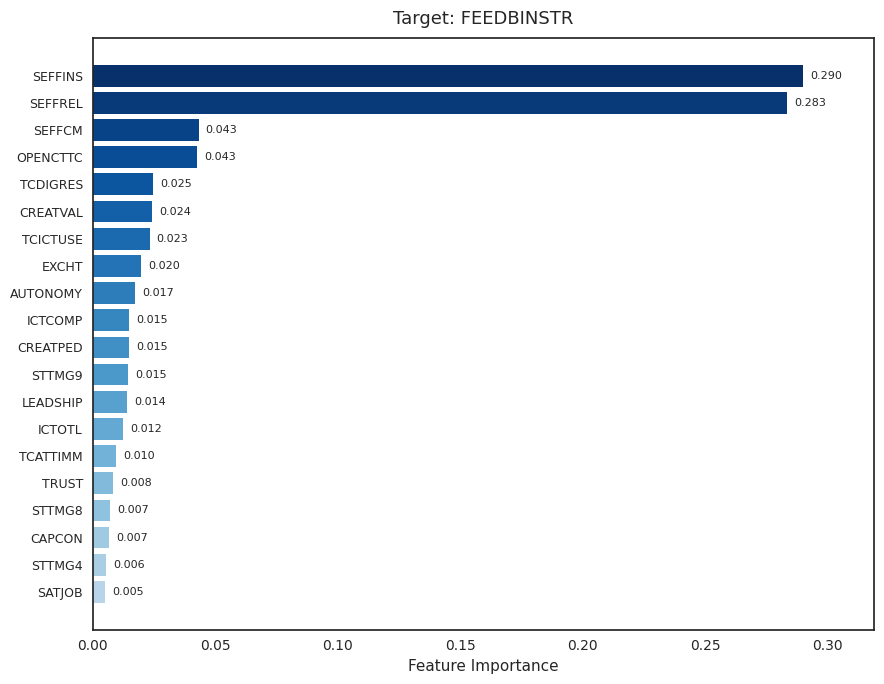

In [37]:
target = 'FEEDBINSTR'
final_model, data_df = run_pycaret_regression(target, train_set=train_df, train_size=0.8, fold=4)
important_features = get_feature_importances(final_model, data_df, target)
plot_feature_importances(important_features, target)

In [38]:
important_features = get_feature_importances(final_model, data_df, target, num_features=None)
print("\n\n===***===")
print(f"Feature Importance of TCISCED: {dict(important_features)['TCISCED']}")


Top 674 Feature Importances (final_model):
SEFFINS                                  0.2899
SEFFREL                                  0.2833
SEFFCM                                   0.0433
OPENCTTC                                 0.0425
TCDIGRES                                 0.0247
CREATVAL                                 0.0243
TCICTUSE                                 0.0232
EXCHT                                    0.0198
AUTONOMY                                 0.0172
ICTCOMP                                  0.0150
CREATPED                                 0.0149
STTMG9                                   0.0145
LEADSHIP                                 0.0139
ICTOTL                                   0.0124
TCATTIMM                                 0.0096
TRUST                                    0.0083
STTMG8                                   0.0071
CAPCON                                   0.0067
STTMG4                                   0.0055
SATJOB                                   0.0

#### 종속변수: ADAPTINSTR

,Description,Value
0,Session id,42
1,Target,ADAPTINSTR
2,Target type,Regression
3,Original data shape,"(2406, 676)"
4,Transformed data shape,"(2406, 676)"
5,Transformed train set shape,"(1924, 676)"
6,Transformed test set shape,"(482, 676)"
7,Numeric features,675


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4894,0.4074,0.6370,0.5122,0.3068,1.8504,0.5980
rf,Random Forest Regressor,0.4837,0.4092,0.6380,0.5103,0.3077,1.7751,0.7240
et,Extra Trees Regressor,0.4903,0.4226,0.6483,0.4943,0.3112,1.7863,0.7460



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
gbr  Gradient Boosting Regressor  0.4894  0.4074  0.6370  0.5122  0.3068   
rf       Random Forest Regressor  0.4837  0.4092  0.6380  0.5103  0.3077   
et         Extra Trees Regressor  0.4903  0.4226  0.6483  0.4943  0.3112   

       MAPE  TT (Sec)  
gbr  1.8504     0.598  
rf   1.7751     0.724  
et   1.7863     0.746  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5380,0.4674,0.6837,0.4005,0.3220,2.3471
1,0.5217,0.4437,0.6661,0.4732,0.3257,1.8148
2,0.5585,0.5199,0.7211,0.4215,0.3383,1.7010
3,0.4852,0.4018,0.6339,0.4843,0.3085,2.4851
4,0.4893,0.3985,0.6313,0.5475,0.3040,2.6868
Mean,0.5185,0.4463,0.6672,0.4654,0.3197,2.2070
Std,0.0281,0.0450,0.0334,0.0516,0.0123,0.3839


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5380  0.4674  0.6837  0.4005  0.3220  2.3471
1     0.5217  0.4437  0.6661  0.4732  0.3257  1.8148
2     0.5585  0.5199  0.7211  0.4215  0.3383  1.7010
3     0.4852  0.4018  0.6339  0.4843  0.3085  2.4851
4     0.4893  0.3985  0.6313  0.5475  0.3040  2.6868
Mean  0.5185  0.4463  0.6672  0.4654  0.3197  2.2070
Std   0.0281  0.0450  0.0334  0.0516  0.0123  0.3839

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5380  0.4674  0.6837  0.4005  0.3220  2.3471
1     0.5217  0.4437  0.6661  0.4732  0.3257  1.8148
2     0.5585  0.5199  0.7211  0

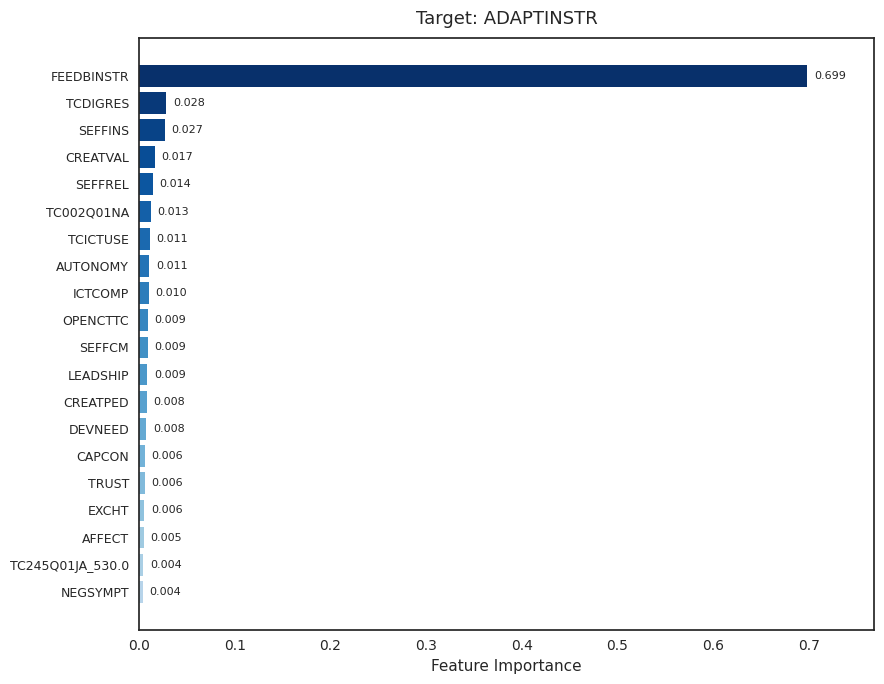

In [39]:
target = 'ADAPTINSTR'
final_model, data_df = run_pycaret_regression(target, train_set=teacher_df, train_size=0.8, fold=5)
important_features = get_feature_importances(final_model, data_df, target)
plot_feature_importances(important_features, target)

,Description,Value
0,Session id,42
1,Target,ADAPTINSTR
2,Target type,Regression
3,Original data shape,"(2406, 675)"
4,Transformed data shape,"(2406, 675)"
5,Transformed train set shape,"(1924, 675)"
6,Transformed test set shape,"(482, 675)"
7,Numeric features,674


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5755,0.5367,0.7321,0.3576,0.3512,2.1512,0.3340
rf,Random Forest Regressor,0.5745,0.5397,0.7338,0.3549,0.3475,2.0324,0.5120
et,Extra Trees Regressor,0.5802,0.5444,0.7373,0.3488,0.3552,2.0282,0.5120



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
gbr  Gradient Boosting Regressor  0.5755  0.5367  0.7321  0.3576  0.3512   
rf       Random Forest Regressor  0.5745  0.5397  0.7338  0.3549  0.3475   
et         Extra Trees Regressor  0.5802  0.5444  0.7373  0.3488  0.3552   

       MAPE  TT (Sec)  
gbr  2.1512     0.334  
rf   2.0324     0.512  
et   2.0282     0.512  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5647,0.5253,0.7248,0.3262,0.3367,2.6246
1,0.5921,0.5448,0.7381,0.3532,0.3574,1.8654
2,0.6102,0.6080,0.7798,0.3235,0.3735,1.6437
3,0.5611,0.5052,0.7108,0.3516,0.3480,2.5246
4,0.5489,0.5001,0.7072,0.4320,0.3557,2.2591
Mean,0.5754,0.5367,0.7321,0.3573,0.3543,2.1835
Std,0.0224,0.0390,0.0262,0.0394,0.0120,0.3766


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5647  0.5253  0.7248  0.3262  0.3367  2.6246
1     0.5921  0.5448  0.7381  0.3532  0.3574  1.8654
2     0.6102  0.6080  0.7798  0.3235  0.3735  1.6437
3     0.5611  0.5052  0.7108  0.3516  0.3480  2.5246
4     0.5489  0.5001  0.7072  0.4320  0.3557  2.2591
Mean  0.5754  0.5367  0.7321  0.3573  0.3543  2.1835
Std   0.0224  0.0390  0.0262  0.0394  0.0120  0.3766

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5647  0.5253  0.7248  0.3262  0.3367  2.6246
1     0.5921  0.5448  0.7381  0.3532  0.3574  1.8654
2     0.6102  0.6080  0.7798  0

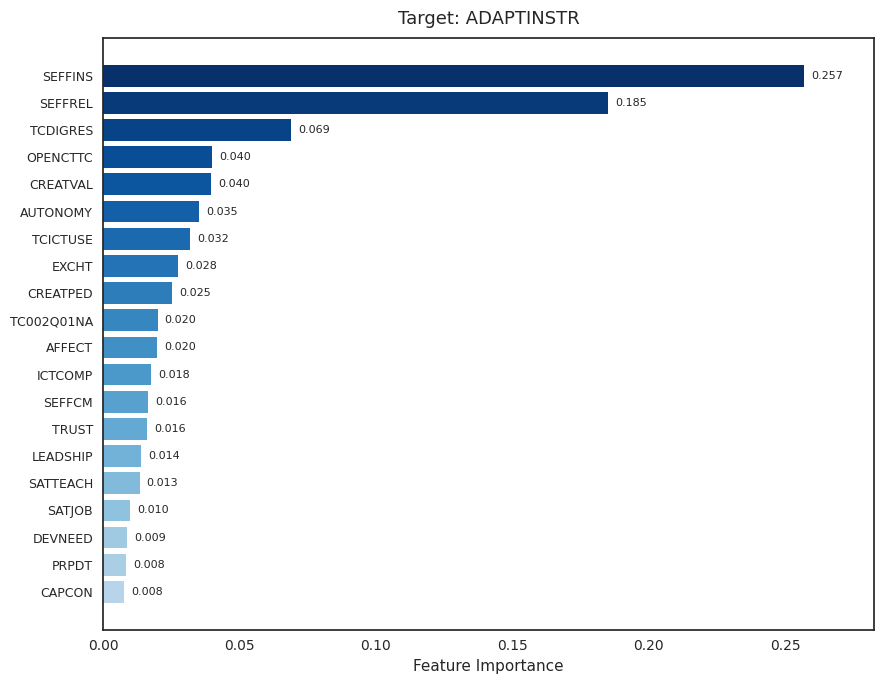

In [40]:
target = 'ADAPTINSTR'
final_model, data_df = run_pycaret_regression(target, train_set=train_df, train_size=0.8, fold=5)
important_features = get_feature_importances(final_model, data_df, target)
plot_feature_importances(important_features, target)

In [41]:
dict(important_features)

{'SEFFINS': 0.2567901638044092,
 'SEFFREL': 0.1852014426259615,
 'TCDIGRES': 0.06897221228434554,
 'OPENCTTC': 0.03998892370144533,
 'CREATVAL': 0.039721543036887644,
 'AUTONOMY': 0.0352652367612394,
 'TCICTUSE': 0.03190273057908623,
 'EXCHT': 0.02758655747768798,
 'CREATPED': 0.025437013191473932,
 'TC002Q01NA': 0.020036587072166198,
 'AFFECT': 0.019947709362800783,
 'ICTCOMP': 0.01753268438647774,
 'SEFFCM': 0.016451070412159506,
 'TRUST': 0.016191330083618345,
 'LEADSHIP': 0.013956662164937137,
 'SATTEACH': 0.013413436654522822,
 'SATJOB': 0.010007311603473049,
 'DEVNEED': 0.00889576674087959,
 'PRPDT': 0.008358403218535367,
 'CAPCON': 0.007618465375247847}

In [42]:
important_features = get_feature_importances(final_model, data_df, target, num_features=None)
print("\n\n===***===")
print(f"Feature Importance of TCISCED: {dict(important_features)['TCISCED']}")


Top 674 Feature Importances (final_model):
SEFFINS                                  0.2568
SEFFREL                                  0.1852
TCDIGRES                                 0.0690
OPENCTTC                                 0.0400
CREATVAL                                 0.0397
AUTONOMY                                 0.0353
TCICTUSE                                 0.0319
EXCHT                                    0.0276
CREATPED                                 0.0254
TC002Q01NA                               0.0200
AFFECT                                   0.0199
ICTCOMP                                  0.0175
SEFFCM                                   0.0165
TRUST                                    0.0162
LEADSHIP                                 0.0140
SATTEACH                                 0.0134
SATJOB                                   0.0100
DEVNEED                                  0.0089
PRPDT                                    0.0084
CAPCON                                   0.0

#### 종속변수: SEFFINS

,Description,Value
0,Session id,42
1,Target,SEFFINS
2,Target type,Regression
3,Original data shape,"(2406, 672)"
4,Transformed data shape,"(2406, 672)"
5,Transformed train set shape,"(2165, 672)"
6,Transformed test set shape,"(241, 672)"
7,Numeric features,671


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6562,0.7743,0.8783,0.3173,0.3776,1.5001,0.5840
et,Extra Trees Regressor,0.6620,0.7824,0.8827,0.3104,0.3876,1.4056,0.5300
gbr,Gradient Boosting Regressor,0.6613,0.7854,0.8843,0.3079,0.3771,1.5919,0.3600



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
rf       Random Forest Regressor  0.6562  0.7743  0.8783  0.3173  0.3776   
et         Extra Trees Regressor  0.6620  0.7824  0.8827  0.3104  0.3876   
gbr  Gradient Boosting Regressor  0.6613  0.7854  0.8843  0.3079  0.3771   

       MAPE  TT (Sec)  
rf   1.5001     0.584  
et   1.4056     0.530  
gbr  1.5919     0.360  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5836,0.6188,0.7867,0.3316,0.3422,2.5002
1,0.6821,0.8194,0.9052,0.2910,0.3946,1.1657
2,0.6986,0.8656,0.9304,0.2838,0.4071,1.5280
3,0.6973,0.8889,0.9428,0.2786,0.4045,1.0992
4,0.6936,0.8420,0.9176,0.2586,0.3755,1.2585
Mean,0.6711,0.8069,0.8965,0.2887,0.3848,1.5103
Std,0.0441,0.0969,0.0563,0.0240,0.0240,0.5160


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5836  0.6188  0.7867  0.3316  0.3422  2.5002
1     0.6821  0.8194  0.9052  0.2910  0.3946  1.1657
2     0.6986  0.8656  0.9304  0.2838  0.4071  1.5280
3     0.6973  0.8889  0.9428  0.2786  0.4045  1.0992
4     0.6936  0.8420  0.9176  0.2586  0.3755  1.2585
Mean  0.6711  0.8069  0.8965  0.2887  0.3848  1.5103
Std   0.0441  0.0969  0.0563  0.0240  0.0240  0.5160

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.5836  0.6188  0.7867  0.3316  0.3422  2.5002
1     0.6821  0.8194  0.9052  0.2910  0.3946  1.1657
2     0.6986  0.8656  0.9304  0

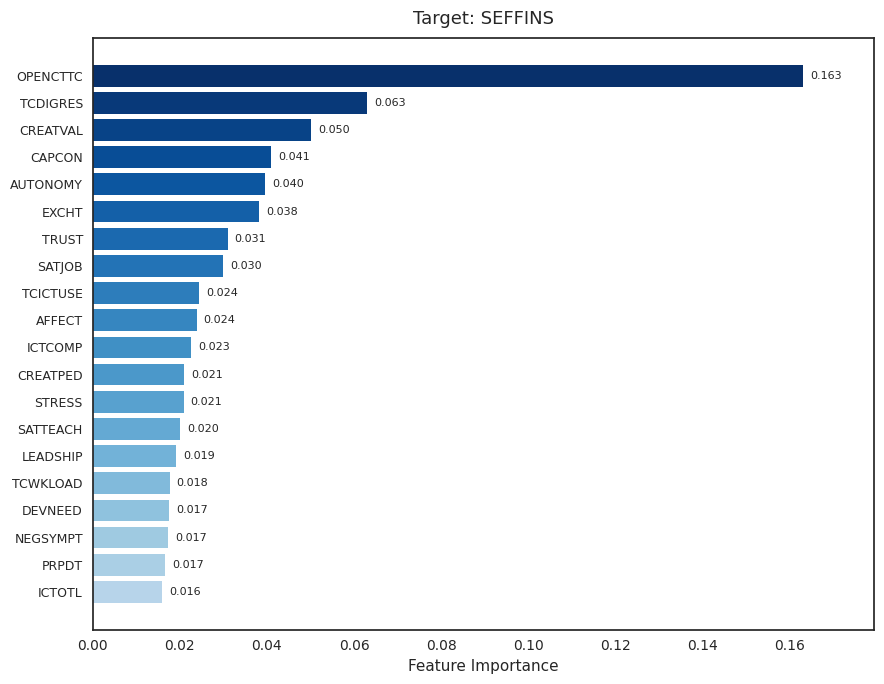

In [43]:
target = 'SEFFINS'

train_df_SEFF = train_df.drop(columns=['SEFFINS', 'SEFFREL', 'SEFFCM'], axis=1) 
final_model, data_df = run_pycaret_regression(target,
                                              train_set=train_df_SEFF,
                                              train_size=0.9,
                                              fold=5)
important_features = get_feature_importances(final_model, data_df, target, num_features=20)
plot_feature_importances(important_features, target)

#### 종속변수: SEFFREL

,Description,Value
0,Session id,42
1,Target,SEFFREL
2,Target type,Regression
3,Original data shape,"(2406, 672)"
4,Transformed data shape,"(2406, 672)"
5,Transformed train set shape,"(2165, 672)"
6,Transformed test set shape,"(241, 672)"
7,Numeric features,671


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.6848,0.8556,0.9242,0.2823,0.4129,1.8217,0.5425
gbr,Gradient Boosting Regressor,0.6860,0.8639,0.9289,0.2748,0.4059,1.8918,0.3675
et,Extra Trees Regressor,0.6903,0.8719,0.9333,0.2676,0.4164,1.7573,0.5100



=== PyCaret Compare Models (정렬: R2) ===
                           Model     MAE     MSE    RMSE      R2   RMSLE  \
rf       Random Forest Regressor  0.6848  0.8556  0.9242  0.2823  0.4129   
gbr  Gradient Boosting Regressor  0.6860  0.8639  0.9289  0.2748  0.4059   
et         Extra Trees Regressor  0.6903  0.8719  0.9333  0.2676  0.4164   

       MAPE  TT (Sec)  
rf   1.8217    0.5425  
gbr  1.8918    0.3675  
et   1.7573    0.5100  


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6585,0.7767,0.8813,0.2948,0.4216,1.5799
1,0.6979,0.9862,0.9931,0.2492,0.4355,1.4822
2,0.7044,0.9112,0.9546,0.2420,0.4310,1.7555
3,0.6918,0.8419,0.9175,0.2656,0.4263,1.5766
Mean,0.6881,0.8790,0.9366,0.2629,0.4286,1.5986
Std,0.0177,0.0781,0.0416,0.0203,0.0052,0.0987


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

=== Tuned Best Model 결과 ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.6585  0.7767  0.8813  0.2948  0.4216  1.5799
1     0.6979  0.9862  0.9931  0.2492  0.4355  1.4822
2     0.7044  0.9112  0.9546  0.2420  0.4310  1.7555
3     0.6918  0.8419  0.9175  0.2656  0.4263  1.5766
Mean  0.6881  0.8790  0.9366  0.2629  0.4286  1.5986
Std   0.0177  0.0781  0.0416  0.0203  0.0052  0.0987

=== Finalized Model (PyCaret 내부 평가) ===
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.6585  0.7767  0.8813  0.2948  0.4216  1.5799
1     0.6979  0.9862  0.9931  0.2492  0.4355  1.4822
2     0.7044  0.9112  0.9546  0.2420  0.4310  1.7555
3     0.6918  0.8419  0.9175  0

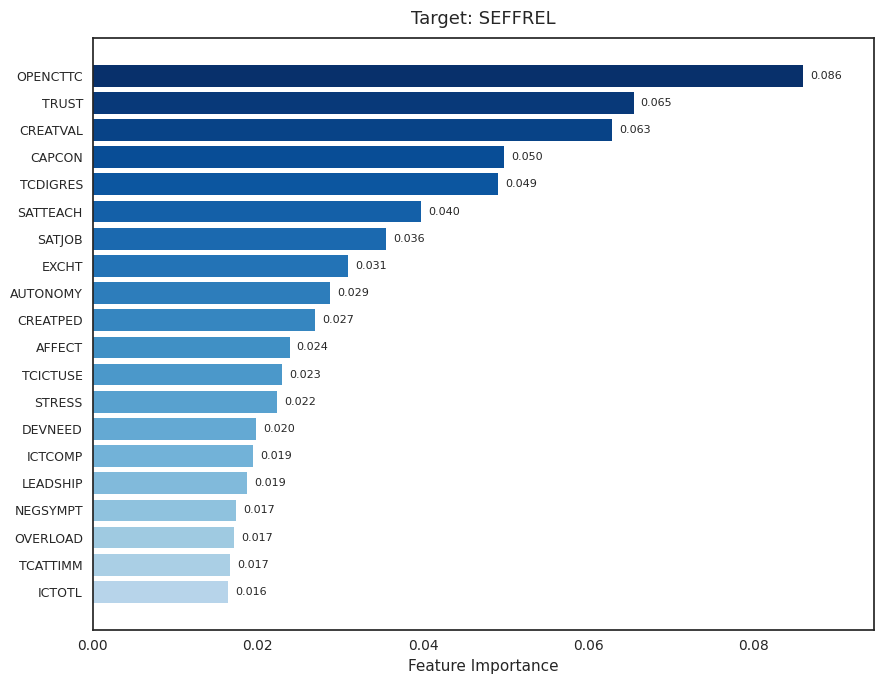

In [44]:
target = 'SEFFREL'

train_df_SEFF = train_df.drop(columns=['SEFFINS', 'SEFFREL', 'SEFFCM'], axis=1) 
final_model, data_df = run_pycaret_regression(target,
                                              train_set=train_df_SEFF,
                                              train_size=0.9,
                                              fold=4)
important_features = get_feature_importances(final_model, data_df, target, num_features=20)
plot_feature_importances(important_features, target)